In [63]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [64]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [65]:
print("Length of train_data:" ,len(train_data))
print("Length of test_data:", len(test_data))


Length of train_data: 8982
Length of test_data: 2246


In [66]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [67]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [68]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
       for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [69]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [70]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [71]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) 

In [72]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
metrics=['accuracy'])

In [73]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [74]:
history = model.fit(partial_x_train,partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
print(history.history)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 113us/step - loss: 2.6903 - acc: 0.4717 - val_loss: 1.8050 - val_acc: 0.6210
Epoch 2/20
7982/7982 [==============================] - 1s 83us/step - loss: 1.4788 - acc: 0.6973 - val_loss: 1.3164 - val_acc: 0.7040
Epoch 3/20
7982/7982 [==============================] - 1s 70us/step - loss: 1.0636 - acc: 0.7825 - val_loss: 1.1288 - val_acc: 0.7730
Epoch 4/20
7982/7982 [==============================] - 1s 70us/step - loss: 0.8304 - acc: 0.8236 - val_loss: 1.0243 - val_acc: 0.7830
Epoch 5/20
7982/7982 [==============================] - 1s 70us/step - loss: 0.6600 - acc: 0.8613 - val_loss: 0.9707 - val_acc: 0.7850
Epoch 6/20
7982/7982 [==============================] - 1s 68us/step - loss: 0.5349 - acc: 0.8896 - val_loss: 0.9199 - val_acc: 0.8080
Epoch 7/20
7982/7982 [==============================] - 1s 70us/step - loss: 0.4314 - acc: 0.9099 - val_loss: 0.9046 - val_acc: 0.8160
Epoch 

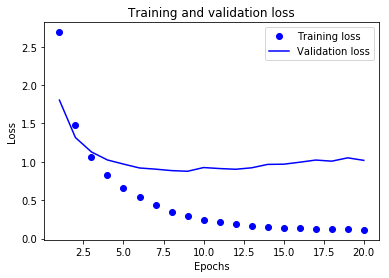

In [75]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

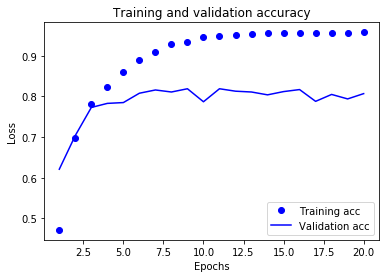

In [76]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()